# Comparison of Classifiers for the Breast Cancer Prediction

In this assignment we have been given the task to create a Decision Tree Classifier and a Naive Bayes Classifier, and compare the results of the two, from the given dataset.

### *The dataset*
We have been given the dataset Breast Cancer Prediction dataset. It contains data from cell nucleus in breast tissue, which is designed to assist diagnosing breastcancer. Here is an overview of the given dataset.

 - Consists of 569 instances/observations.
    - Class distribution: 357 benign (62.74%), 212 malignant (37.76%)

 - Has 30 numerical features. Excluding ID and diagnosis.

 - The features are real, meaning they will consist of floating point numbers.
 
 - Classification problem, where the goal is to classify cancer tumours, based on cell properties.


#### *What is the purpose of this dataset?*
The purpose of this dataset is as mentioned before, using data from cell nucleus in breast tissue to assist diagnosing breastcancer.

#### *What are the features?*
The features are numeric values that describe different properties of the tumor. Such as texture, radius, smoothness and etc.

#### *What are the targets?*
M and B, will act as our boolean outputs/targets. Where B is benign, which will act as our boolean 0. The M is malignant, the opposite of the benign, will act as our boolean 1.

In other words, it can be simplified to as follows. B is for when the tumor is benign, and M is when tumor is malignant.


In [73]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

In [74]:
dataset = pd.read_csv('wdbc.data', sep=",", header=None)
dataset.drop(columns=[0], inplace=True)
dataset[1] = dataset[1].map({'M': 1, 'B': 0})
dataset.head(5)


,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


array([[<Axes: title={'center': '1'}>]], dtype=object)

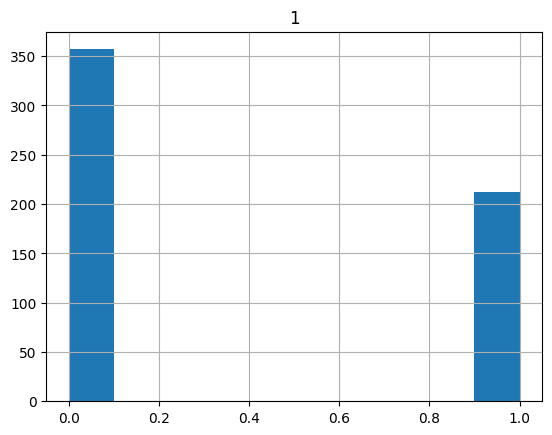

In [75]:
dataset.hist(1) #Histogram of our targets.

## Pre-prossesing of data
Since this is a .data file and not a .csv file, the first row is now a "header" for the other coloums. We can fix this by setting header=None.

Our pre-prossesing will consist of removing the ID, since it's not relevant for us. So we will use dataset.drop(columns=[0], inplace=True) to remove the ID coloumn.

Additionally, we are remapping our B and M features to boolean features to provide more clarity, and it will most likely help, later on.





## Splitting the dataset


### *Choosing the sampling technique*

The chosen sampling tehcniquie will we be using stratified sampling. 

We want to maintain our proportion of classes in our splits. Each split will become a 'smaller verison' of our whole dataset. This sampling technique will ensure that each split will have the same ratio of both cases(Malignant to benign cases) as in the full dataset. 

In other words, we want to assure that we avoid situations where, by chance, one of the splits gets too many of one class. 

There was an attempt in using random sampling technique, however the results affected the validation precision and recall to an extent that made them unusable. Therefore we will use stratified sampling going forward.

### *The 60/20/20 split*
My approach to the splitting of the dataset will be a 60/20/20 split. Reason for this is that model reliabilty is crucial in our case. Therefore choosing 60/20/20 split will provide better balance between training and evaluation. This should also enhance our ability to prevent overfitting. In other words, we wants our evaluation to be thourough and the model to be able to generalize well to new data. 

- 60% for training
  - This will ensure the model has enough data to learn from. In other words, it should be sufficient enough to capture the patterns and complexities within the data.

- 20% for validation
  -  This allow us to tune our hyperparamaters and make decisions according to our performance, without overfitting to the training data.

- 20% for testing
  - This will be used for having an unbiased evaluation of the models performance. This occurs after the training and the validation, to ensure its evaluating data it has not seen before.

### *Comparing our split choice with the 80/10/10 split*

When arriving at the question of choosing the correct split, it stood between two options. Either the 60/20/20 split or 80/10/10. So to elaborate why I didnt choose the 80/10/10, boils down to that the split is relevant for when the scenario is about maximizing the training data, which is not our desired goal.  


### *Defending the chosen 60/20/20 split*

Why I think this is a good approach is that there will be sufficent data for the training to yield good results, without overfitting. It has a balanced evaluation which provides flexibility and reliability. 

## Creating our split

In [76]:
# Making our 60/20/20 split

# Split off 20% for testing
training_validation, test = train_test_split(dataset, test_size=0.2, stratify=dataset[1], random_state=42)

# Split the remaining 80% into 75% train (60% of total) and 25% validation (20% of total)
train, validation = train_test_split(training_validation, test_size=0.25, stratify=training_validation[1], random_state=42)


#This approach was inspired from the book: Machine learning for absolute beginners 2017 page 126. With added stratify.

In [77]:
train_features = train.drop(columns=[1])                    #Defining our training features
train_target = train[1]                                     #Defining our training target

validation_features = validation.drop(columns=[1])          #Defining our vailidation features
validation_target = validation[1]                           #Defining our vailidation target

test_features = test.drop(columns=[1])                      #Defining our test features
test_target = test[1]                                       #Defining our test target

### Creating our Decision Tree model

In [78]:
# Adding max_depth to limit the complexity, a random seed to reproduce the randomness, and a minimum samples per split to also help with overfitting
decision_tree_model1 = DecisionTreeClassifier(max_depth=5,random_state=42, min_samples_split=5)  

decision_tree_model1.fit(train_features, train_target)

DecisionTreeClassifier(max_depth=5, min_samples_split=5, random_state=42)

### Creating our Naive Bayes model

In [79]:
naive_bayes_model1 = GaussianNB()
naive_bayes_model1.fit(train_features, train_target)

GaussianNB()

In [80]:
def evaluate(model, final_eval=False):

    train_predictions = model.predict(train_features)
    validation_predictions = model.predict(validation_features)

    print(f'Training Accuracy: {accuracy_score(train_target, train_predictions)}')
    print(f'Training Precision: {precision_score(train_target, train_predictions)}')
    print(f'Training Recall: {recall_score(train_target, train_predictions)}')
    print(f'Training F1: {f1_score(train_target, train_predictions)}')

    print(f'Validation Accuracy: {accuracy_score(validation_target, validation_predictions)}')
    print(f'Validation Precision: {precision_score(validation_target, validation_predictions)}')
    print(f'Validation Recall: {recall_score(validation_target, validation_predictions)}')
    print(f'Validation F1: {f1_score(validation_target, validation_predictions)}')
    
    if final_eval:
        test_predictions = model.predict(test_features)
        print("")
        print(f'Test Accuracy: {accuracy_score(test_target, test_predictions)}')
        print(f'Test Precision: {precision_score(test_target, test_predictions)}')
        print(f'Test Recall: {recall_score(test_target, test_predictions)}')
        print(f'Test F1: {f1_score(test_target, test_predictions)}')

In [81]:
print("Decision Tree Classifier:")

evaluate(decision_tree_model1, final_eval=1)
print("")
print("Naive Bayes Classifier:")
evaluate(naive_bayes_model1, final_eval=1)

Decision Tree Classifier:
Training Accuracy: 0.9853372434017595
Training Precision: 0.9841269841269841
Training Recall: 0.9763779527559056
Training F1: 0.9802371541501976
Validation Accuracy: 0.8947368421052632
Validation Precision: 0.8444444444444444
Validation Recall: 0.8837209302325582
Validation F1: 0.8636363636363636

Test Accuracy: 0.9122807017543859
Test Precision: 0.9
Test Recall: 0.8571428571428571
Test F1: 0.8780487804878049

Naive Bayes Classifier:
Training Accuracy: 0.9413489736070382
Training Precision: 0.9495798319327731
Training Recall: 0.889763779527559
Training F1: 0.9186991869918699
Validation Accuracy: 0.956140350877193
Validation Precision: 0.9523809523809523
Validation Recall: 0.9302325581395349
Validation F1: 0.9411764705882353

Test Accuracy: 0.9298245614035088
Test Precision: 0.9722222222222222
Test Recall: 0.8333333333333334
Test F1: 0.8974358974358975


## Discussing the results

### The Decision Tree Classifier

- The training results from the Decision Tree Classifier: . 

    - Training accuracy at 98.5%
    - Training precision at 98.4%
    - Training recall at 88.9%
    - Training F1 at 91.8%



- The validation results from the Decision Tree Classifier: 

    - Validation accuracy at 89.4%
    - Validation precision at 84.4%
    - Validation recall at 88.3%
    - Validation F1 at 86.3%

- The test results from the Decision Tree Classifier: 

    - Test accuracy at 91.2%
    - Test precision at 90.0%
    - Test recall at 85.7%
    - Test F1 at 87.8% 

#### *Summary of Decision Tree Classifier*

Training shows very high performance in all scores. This tells us that model fits our training data pretty good. 

Validation shows less performance than the training. This could indicate some overfitting. However it could be argued that it still performs decent with a 89.4% score. But definitely room for improvement.

Test performance scored better over the validation. This could be interpreted as a good sign. This also tells us that the model works good on data that it has not seen before. In other words, it learned good patterns on the unseen data.

### The Gaussian Naive Bayes Classifier

- The training results from the Gaussian Naive Bayes: . 

    - Training accuracy at 94.1%
    - Training precision at 94.9%
    - Training recall at 88.9%
    - Training F1 at 91.8%


- The validation results from the Gaussian Naive Bayes: 

    - Validation accuracy at 95.6%
    - Validation precision at 95.2%
    - Validation recall at 93.0%
    - Validation F1 at 94.1%

- The test results from the Gaussian Naive Bayes: 

    - Test accuracy at 92.9%
    - Test precision at 97.2%
    - Test recall at 83.3%
    - Test F1 at 89.7% 

#### *Summary of Gaussian Naive Bayes Classifier*

Training data scored a little lower than the Decision tree. Validation and Test performance is better.

### Conclusion
The Gaussian Naive Bayes model fits the dataset better based on the overall performance of the scores. Seems to be better at generalizing than the Decision Tree model.
However the Decision tree model did score better on training precision and recall. But since our focus is on accuracy and consistancy, is the Gaussian Naive Bayes model is better in this case. (By saying consistancy, is that it performes better on all three sets compared to the Decision tree model.)

### Possible improvements

There was no usage of cross validation or pruning to assist the validation. 